In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer

In [355]:
df = pd.read_csv(r"E:\myfile\project 1\1\zomato.csv")
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...   
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51713                           Vinod Bar And Restaurant           No   
51714  Plunge - Sheraton Grand Bengaluru Whitefield H...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table    rate  votes                             phone  \
0            Yes   4.1/5    775    080 42297555\r\n+91 9743772233   
1             No   4.1/5    787                      080 41714161   
2             No   3.8/5    918                    +91 9663487993   
3             No   3.7/5     88                    +91 9620009302   
4             No   3.8/5    166  +91 8026612447\r\n+91 9901210005   
...          ...     ...    ...                               ...   
51712         No  3.6 /5     27                      080 40301477   
51713         No     NaN      0                    +91 8197675843   
51714         No     NaN      0                               NaN   
51715        Yes  4.3 /5    236                      080 49652769   
51716         No  3.4 /5     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51712                  Whitefield                  Bar   
51713                  Whitefield                  Bar   
51714                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, 

In [155]:
df.duplicated().sum()

0

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
# univarite analysis 

In [356]:
df.drop(["url","address"] , axis = 1 , inplace = True) # Don't need this column 

In [357]:
df.name.nunique() # have 6602 restaurant

8792

In [358]:
df["online_order"].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

<AxesSubplot:xlabel='online_order', ylabel='count'>

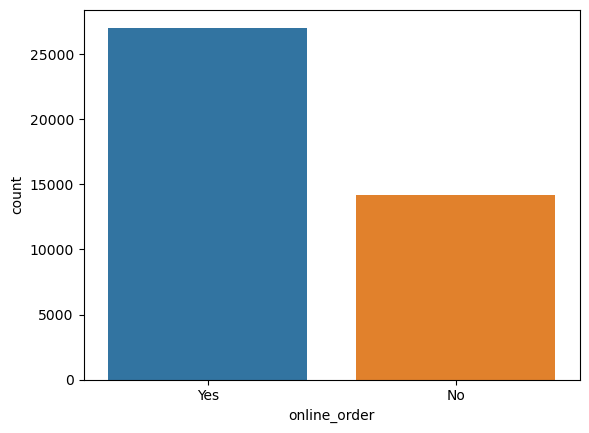

In [63]:
sns.countplot(data=df,x='online_order')

In [26]:
# plotly Chart
px.histogram(data_frame=df , x = "online_order")

In [27]:
df["book_table"].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [28]:
df["rate"].unique().tolist()

['4.1/5',
 '3.8/5',
 '3.7/5',
 '3.6/5',
 '4.6/5',
 '4.0/5',
 '4.2/5',
 '3.9/5',
 '3.1/5',
 '3.0/5',
 '3.2/5',
 '3.3/5',
 '2.8/5',
 '4.4/5',
 '4.3/5',
 'NEW',
 '2.9/5',
 '3.5/5',
 nan,
 '2.6/5',
 '3.8 /5',
 '3.4/5',
 '4.5/5',
 '2.5/5',
 '2.7/5',
 '4.7/5',
 '2.4/5',
 '2.2/5',
 '2.3/5',
 '3.4 /5',
 '-',
 '3.6 /5',
 '4.8/5',
 '3.9 /5',
 '4.2 /5',
 '4.0 /5',
 '4.1 /5',
 '3.7 /5',
 '3.1 /5',
 '2.9 /5',
 '3.3 /5',
 '2.8 /5',
 '3.5 /5',
 '2.7 /5',
 '2.5 /5',
 '3.2 /5',
 '2.6 /5',
 '4.5 /5',
 '4.3 /5',
 '4.4 /5',
 '4.9/5',
 '2.1/5',
 '2.0/5',
 '1.8/5',
 '4.6 /5',
 '4.9 /5',
 '3.0 /5',
 '4.8 /5',
 '2.3 /5',
 '4.7 /5',
 '2.4 /5',
 '2.1 /5',
 '2.2 /5',
 '2.0 /5',
 '1.8 /5']

In [359]:
def fix_rate(r):
    if r in ["NEW" , "-" , "nan"]:
        return np.nan
    else:
        return float(r[0:3])

In [360]:
df["rate"].value_counts(dropna=False)

NaN       7775
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 65, dtype: int64

In [361]:
df["rate"] = df["rate"].astype(str).apply(fix_rate)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   phone                        50509 non-null  object 
 6   location                     51696 non-null  object 
 7   rest_type                    51490 non-null  object 
 8   dish_liked                   23639 non-null  object 
 9   cuisines                     51672 non-null  object 
 10  approx_cost(for two people)  51371 non-null  object 
 11  reviews_list                 51717 non-null  object 
 12  menu_item                    51717 non-null  object 
 13  listed_in(type) 

In [34]:
df["votes"].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

<AxesSubplot:xlabel='votes'>

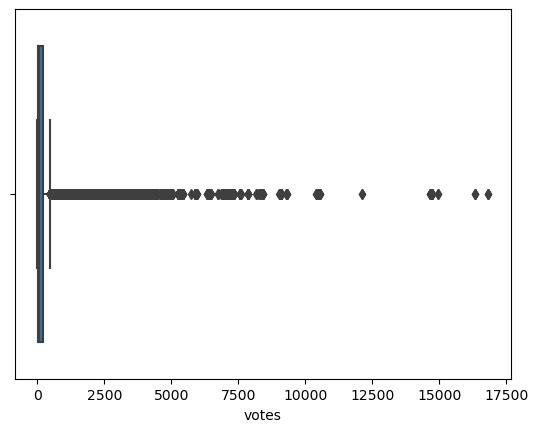

In [35]:
sns.boxplot(data=df , x ="votes")

In [362]:
df.drop("phone" , axis = 1 , inplace = True)

In [37]:
df["location"].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [38]:
sorted(df["location"].astype(str).unique()) # to show all data clearer

['BTM',
 'Banashankari',
 'Banaswadi',
 'Bannerghatta Road',
 'Basavanagudi',
 'Basaveshwara Nagar',
 'Bellandur',
 'Bommanahalli',
 'Brigade Road',
 'Brookefield',
 'CV Raman Nagar',
 'Central Bangalore',
 'Church Street',
 'City Market',
 'Commercial Street',
 'Cunningham Road',
 'Domlur',
 'East Bangalore',
 'Ejipura',
 'Electronic City',
 'Frazer Town',
 'HBR Layout',
 'HSR',
 'Hebbal',
 'Hennur',
 'Hosur Road',
 'ITPL Main Road, Whitefield',
 'Indiranagar',
 'Infantry Road',
 'JP Nagar',
 'Jakkur',
 'Jalahalli',
 'Jayanagar',
 'Jeevan Bhima Nagar',
 'KR Puram',
 'Kaggadasapura',
 'Kalyan Nagar',
 'Kammanahalli',
 'Kanakapura Road',
 'Kengeri',
 'Koramangala',
 'Koramangala 1st Block',
 'Koramangala 2nd Block',
 'Koramangala 3rd Block',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Koramangala 8th Block',
 'Kumaraswamy Layout',
 'Langford Town',
 'Lavelle Road',
 'MG Road',
 'Magadi Road',
 'Majestic',
 'Malleshwaram',
 'M

In [39]:
sorted(df["rest_type"].astype(str).unique())

['Bakery',
 'Bakery, Beverage Shop',
 'Bakery, Cafe',
 'Bakery, Dessert Parlor',
 'Bakery, Food Court',
 'Bakery, Kiosk',
 'Bakery, Quick Bites',
 'Bakery, Sweet Shop',
 'Bar',
 'Bar, Cafe',
 'Bar, Casual Dining',
 'Bar, Lounge',
 'Bar, Pub',
 'Bar, Quick Bites',
 'Beverage Shop',
 'Beverage Shop, Cafe',
 'Beverage Shop, Dessert Parlor',
 'Beverage Shop, Quick Bites',
 'Bhojanalya',
 'Cafe',
 'Cafe, Bakery',
 'Cafe, Bar',
 'Cafe, Casual Dining',
 'Cafe, Dessert Parlor',
 'Cafe, Food Court',
 'Cafe, Lounge',
 'Cafe, Quick Bites',
 'Casual Dining',
 'Casual Dining, Bar',
 'Casual Dining, Cafe',
 'Casual Dining, Irani Cafee',
 'Casual Dining, Lounge',
 'Casual Dining, Microbrewery',
 'Casual Dining, Pub',
 'Casual Dining, Quick Bites',
 'Casual Dining, Sweet Shop',
 'Club',
 'Club, Casual Dining',
 'Confectionery',
 'Delivery',
 'Dessert Parlor',
 'Dessert Parlor, Bakery',
 'Dessert Parlor, Beverage Shop',
 'Dessert Parlor, Cafe',
 'Dessert Parlor, Food Court',
 'Dessert Parlor, Kiosk',
 

In [121]:
df.dish_liked.isna().sum()/len(df)

0.5429162557766305

In [363]:
df.drop(["dish_liked"] , axis =1 , inplace = True) # drop this column because more 50% is NAN

In [187]:
df.head(2)

name online_order book_table  rate  votes      location  \
0           Jalsa          Yes        Yes   4.1    775  Banashankari   
1  Spice Elephant          Yes         No   4.1    787  Banashankari   

       rest_type                        cuisines approx_cost(for two people)  \
0  Casual Dining  North Indian, Mughlai, Chinese                         800   
1  Casual Dining     Chinese, North Indian, Thai                         800   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [89]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [91]:
df["cuisines"].value_counts()

North Indian                                   2913
North Indian, Chinese                          2385
South Indian                                   1828
Biryani                                         918
Bakery, Desserts                                911
                                               ... 
North Indian, Chinese, South Indian, Juices       1
North Indian, Chinese, Kebab, Mughlai             1
Chinese, Vietnamese, Thai, Malaysian              1
Arabian, Lebanese, Chinese, Rolls                 1
North Indian, Chinese, Arabian, Momos             1
Name: cuisines, Length: 2723, dtype: int64

In [92]:
sorted(df["cuisines"].astype(str).unique())

['African, Burger',
 'African, Burger, Desserts, Beverages, Fast Food',
 'American',
 'American, Asian, Continental, North Indian, South Indian, Chinese',
 'American, Asian, European, North Indian',
 'American, BBQ',
 'American, Bakery, Beverages, Cafe, Healthy Food, Juices, North Indian, Sandwich',
 'American, Burger, Fast Food',
 'American, Burger, Italian, Steak',
 'American, Burger, Momos, Bengali',
 'American, Cafe, Chinese, Italian, Desserts',
 'American, Cafe, Continental',
 'American, Cafe, Continental, French, Burger, Mexican, Desserts, Pizza',
 'American, Chinese',
 'American, Chinese, Continental, North Indian',
 'American, Continental',
 'American, Continental, BBQ, Steak',
 'American, Continental, Chinese',
 'American, Continental, Fast Food, Steak',
 'American, Continental, Finger Food',
 'American, Continental, North Indian, Mediterranean',
 'American, Continental, North Indian, Salad',
 'American, Continental, North Indian, South Indian',
 'American, Continental, Pizza'

In [93]:
df["approx_cost(for two people)"].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [364]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].astype(str).apply(lambda r : float(r.replace("," , "")))

In [365]:
df["approx_cost(for two people)"].value_counts()

300.0     7576
400.0     6562
500.0     4980
200.0     4857
600.0     3714
          ... 
60.0         1
5000.0       1
3700.0       1
469.0        1
160.0        1
Name: approx_cost(for two people), Length: 70, dtype: int64

<AxesSubplot:xlabel='approx_cost(for two people)'>

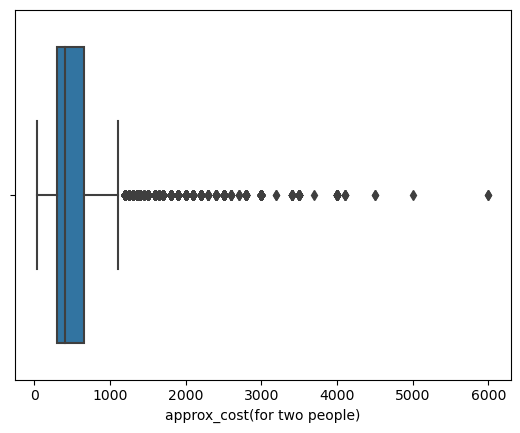

In [366]:
sns.boxplot(data=df,x='approx_cost(for two people)')

In [367]:
df.head(2)

name online_order book_table  rate  votes      location  \
0           Jalsa          Yes        Yes   4.1    775  Banashankari   
1  Spice Elephant          Yes         No   4.1    787  Banashankari   

       rest_type                        cuisines  approx_cost(for two people)  \
0  Casual Dining  North Indian, Mughlai, Chinese                        800.0   
1  Casual Dining     Chinese, North Indian, Thai                        800.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari

In [368]:
df.drop(['reviews_list','menu_item'] , axis = 1 , inplace = True)

In [129]:
df["listed_in(type)"].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [49]:
sorted(df["listed_in(city)"].unique())

['BTM',
 'Banashankari',
 'Bannerghatta Road',
 'Basavanagudi',
 'Bellandur',
 'Brigade Road',
 'Brookefield',
 'Church Street',
 'Electronic City',
 'Frazer Town',
 'HSR',
 'Indiranagar',
 'JP Nagar',
 'Jayanagar',
 'Kalyan Nagar',
 'Kammanahalli',
 'Koramangala 4th Block',
 'Koramangala 5th Block',
 'Koramangala 6th Block',
 'Koramangala 7th Block',
 'Lavelle Road',
 'MG Road',
 'Malleshwaram',
 'Marathahalli',
 'New BEL Road',
 'Old Airport Road',
 'Rajajinagar',
 'Residency Road',
 'Sarjapur Road',
 'Whitefield']

#### Check duplicated data again , after removing many columns

In [369]:
df.duplicated().sum()

108

In [370]:
df.drop_duplicates(inplace = True)

In [371]:
df.reset_index(drop=True,inplace=True)

In [372]:
df.isnull().mean() * 100

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.413281
votes                           0.000000
location                        0.040691
rest_type                       0.439846
cuisines                        0.087194
approx_cost(for two people)     0.666550
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

#### Drop Missing Data

In [373]:
df.dropna(inplace = True)

In [374]:
df.reset_index(drop = True , inplace = True)

#### Feature Engineering

In [375]:
df

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
41185                         The Farm House Bar n Grill           No   
41186                                            Bhagini           No   
41187  Best Brews - Four Points by Sheraton Bengaluru...           No   
41188  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
41189                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                    location  \
0            Yes   4.1    775                Banashankari   
1             No   4.1    787                Banashankari   
2             No   3.8    918                Banashankari   
3             No   3.7     88                Banashankari   
4             No   3.8    166                Basavanagudi   
...          ...   ...    ...                         ...   
41185         No   3.7     34                  Whitefield   
41186         No   2.5     81                  Whitefield   
41187         No   3.6     27                  Whitefield   
41188        Yes   4.3    236  ITPL Main Road, Whitefield   
41189         No   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                     cuisines  \
0            Casual Dining               North Indian, Mughlai, Chinese   
1            Casual Dining                  Chinese, North Indian, Thai   
2      Cafe, Casual Dining                       Cafe, Mexican, Italian   
3              Quick Bites                   South Indian, North Indian   
4            Casual Dining                     North Indian, Rajasthani   
...                    ...                                          ...   
41185   Casual Dining, Bar                    North Indian, Continental   
41186   Casual Dining, Bar  Andhra, South Indian, Chinese, North Indian   
41187                  Bar                                  Continental   
41188                  Bar                                  Finger Food   
41189   Bar, Casual Dining       Finger Food, North Indian, Continental   

       approx_cost(for two people) listed_in(type) listed_in(city)  
0                            800.0          Buffet    Banashankari  
1                            800.0          Buffet    Banashankari  
2                            800.0          Buffet    Banashankari  
3                            300.0          Buffet    Banashankari  
4                            600.0          Buffet    Banashankari  
...                            ...             ...             ...  
41185                        800.0   Pubs and bars      Whitefield  
41186                        800.0   Pubs and bars      Whitefield  
41187                       1500.0   Pubs and bars      Whitefield  
41188                       2500.0   Pubs and bars      Whitefield  
41189                       1500.0   Pubs and bars      Whitefield  

[41190 rows x 11 columns]

### For rest_type  and cuisnes

In [ ]:
# to get the unique cuisines

In [376]:
column_values = df['cuisines']

# Step 2: Split the values using comma as the delimiter
split_values = column_values.str.split(',')

# Step 3: Flatten the list of values
flattened_values = [value for sublist in split_values for value in sublist]

# Step 4: Get unique values
unique_values = pd.unique(flattened_values)

In [199]:
sorted(unique_values)

[' Afghan',
 ' Afghani',
 ' African',
 ' American',
 ' Andhra',
 ' Arabian',
 ' Asian',
 ' Assamese',
 ' Awadhi',
 ' BBQ',
 ' Bakery',
 ' Bar Food',
 ' Belgian',
 ' Bengali',
 ' Beverages',
 ' Bihari',
 ' Biryani',
 ' British',
 ' Bubble Tea',
 ' Burger',
 ' Burmese',
 ' Cafe',
 ' Cantonese',
 ' Charcoal Chicken',
 ' Chettinad',
 ' Chinese',
 ' Coffee',
 ' Continental',
 ' Desserts',
 ' Drinks Only',
 ' European',
 ' Fast Food',
 ' Finger Food',
 ' French',
 ' German',
 ' Goan',
 ' Greek',
 ' Grill',
 ' Gujarati',
 ' Healthy Food',
 ' Hot dogs',
 ' Hyderabadi',
 ' Ice Cream',
 ' Indonesian',
 ' Iranian',
 ' Italian',
 ' Japanese',
 ' Jewish',
 ' Juices',
 ' Kashmiri',
 ' Kebab',
 ' Kerala',
 ' Konkan',
 ' Korean',
 ' Lebanese',
 ' Lucknowi',
 ' Maharashtrian',
 ' Malaysian',
 ' Mangalorean',
 ' Mediterranean',
 ' Mexican',
 ' Middle Eastern',
 ' Mithai',
 ' Modern Indian',
 ' Momos',
 ' Mongolian',
 ' Mughlai',
 ' Naga',
 ' Nepalese',
 ' North Eastern',
 ' North Indian',
 ' Oriya',
 ' 

#### There are a lot of values , so we will count the number of cuisines and rest_type in each resturant

In [377]:
df["cuisines_counts"] = df["cuisines"].apply(lambda r : len(r.split(",")))
df["rest_type_counts"] = df["rest_type"].apply(lambda r : len(r.split(",")))

In [203]:
df

name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
41185                         The Farm House Bar n Grill           No   
41186                                            Bhagini           No   
41187  Best Brews - Four Points by Sheraton Bengaluru...           No   
41188  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
41189                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                    location  \
0            Yes   4.1    775                Banashankari   
1             No   4.1    787                Banashankari   
2             No   3.8    918                Banashankari   
3             No   3.7     88                Banashankari   
4             No   3.8    166                Basavanagudi   
...          ...   ...    ...                         ...   
41185         No   3.7     34                  Whitefield   
41186         No   2.5     81                  Whitefield   
41187         No   3.6     27                  Whitefield   
41188        Yes   4.3    236  ITPL Main Road, Whitefield   
41189         No   3.4     13  ITPL Main Road, Whitefield   

                 rest_type                                     cuisines  \
0            Casual Dining               North Indian, Mughlai, Chinese   
1            Casual Dining                  Chinese, North Indian, Thai   
2      Cafe, Casual Dining                       Cafe, Mexican, Italian   
3              Quick Bites                   South Indian, North Indian   
4            Casual Dining                     North Indian, Rajasthani   
...                    ...                                          ...   
41185   Casual Dining, Bar                    North Indian, Continental   
41186   Casual Dining, Bar  Andhra, South Indian, Chinese, North Indian   
41187                  Bar                                  Continental   
41188                  Bar                                  Finger Food   
41189   Bar, Casual Dining       Finger Food, North Indian, Continental   

       approx_cost(for two people) listed_in(type) listed_in(city)  \
0                            800.0          Buffet    Banashankari   
1                            800.0          Buffet    Banashankari   
2                            800.0          Buffet    Banashankari   
3                            300.0          Buffet    Banashankari   
4                            600.0          Buffet    Banashankari   
...                            ...             ...             ...   
41185                        800.0   Pubs and bars      Whitefield   
41186                        800.0   Pubs and bars      Whitefield   
41187                       1500.0   Pubs and bars      Whitefield   
41188                       2500.0   Pubs and bars      Whitefield   
41189                       1500.0   Pubs and bars      Whitefield   

       cuisines_counts  rest_type_counts  
0                    3                 1  
1                    3                 1  
2                    3                 2  
3                    2                 1  
4                    2                 1  
...                ...               ...  
41185                2                 2  
41186                4                 2  
41187                1                 1  
41188                1                 1  
41189                3                 2  

[41190 rows x 13 columns]

In [ ]:
# lets use MultiLabelBinarizer in cuisines to use in analysis like get Which cuisines has more demand?  

In [378]:
df_cuisines = pd.DataFrame(df["cuisines"].apply(lambda r : r.replace(", " , ",").split(","))) # we will change to list of cuisnes becuase MultiLabelBinarizer accept only list

In [379]:
df_cuisines

cuisines
0                   [North Indian, Mughlai, Chinese]
1                      [Chinese, North Indian, Thai]
2                           [Cafe, Mexican, Italian]
3                       [South Indian, North Indian]
4                         [North Indian, Rajasthani]
...                                              ...
41185                    [North Indian, Continental]
41186  [Andhra, South Indian, Chinese, North Indian]
41187                                  [Continental]
41188                                  [Finger Food]
41189       [Finger Food, North Indian, Continental]

[41190 rows x 1 columns]

In [380]:
mlb = MultiLabelBinarizer()

In [381]:
df_cuisines_encoded = pd.DataFrame(mlb.fit_transform(df_cuisines["cuisines"]) , columns=mlb.classes_)

In [382]:
df_cuisines_encoded

Afghan  Afghani  African  American  Andhra  Arabian  Asian  Assamese  \
0           0        0        0         0       0        0      0         0   
1           0        0        0         0       0        0      0         0   
2           0        0        0         0       0        0      0         0   
3           0        0        0         0       0        0      0         0   
4           0        0        0         0       0        0      0         0   
...       ...      ...      ...       ...     ...      ...    ...       ...   
41185       0        0        0         0       0        0      0         0   
41186       0        0        0         0       1        0      0         0   
41187       0        0        0         0       0        0      0         0   
41188       0        0        0         0       0        0      0         0   
41189       0        0        0         0       0        0      0         0   

       Australian  Awadhi  BBQ  Bakery  Bar Food  Belgian  Bengali  Beverages  \
0               0       0    0       0         0        0        0          0   
1               0       0    0       0         0        0        0          0   
2               0       0    0       0         0        0        0          0   
3               0       0    0       0         0        0        0          0   
4               0       0    0       0         0        0        0          0   
...           ...     ...  ...     ...       ...      ...      ...        ...   
41185           0       0    0       0         0        0        0          0   
41186           0       0    0       0         0        0        0          0   
41187           0       0    0       0         0        0        0          0   
41188           0       0    0       0         0        0        0          0   
41189           0       0    0       0         0        0        0          0   

       Bihari  ...  Singaporean  South American  South Indian  Spanish  \
0           0  ...            0               0             0        0   
1           0  ...            0               0             0        0   
2           0  ...            0               0             0        0   
3           0  ...            0               0             1        0   
4           0  ...            0               0             0        0   
...       ...  ...          ...             ...           ...      ...   
41185       0  ...            0               0             0        0   
41186       0  ...            0               0             1        0   
41187       0  ...            0               0             0        0   
41188       0  ...            0               0             0        0   
41189       0  ...            0               0             0        0   

       Sri Lankan  Steak  Street Food  Sushi  Tamil  Tea  Tex-Mex  Thai  \
0               0      0            0      0      0    0        0     0   
1               0      0            0      0      0    0        0     1   
2               0      0            0      0      0    0        0     0   
3               0      0            0      0      0    0        0     0   
4               0      0            0      0      0    0        0     0   
...           ...    ...          ...    ...    ...  ...      ...   ...   
41185           0      0            0      0      0    0        0     0   
41186           0      0            0      0      0    0        0     0   
41187           0      0            0      0      0    0        0     0   
41188           0      0            0      0      0    0        0     0   
41189           0      0            0      0      0    0        0     0   

       Tibetan  Turkish  Vegan  Vietnamese  Wraps  
0            0        0      0           0      0  
1            0        0      0           0      0  
2            0        0      0           0      0  
3            0        0      0           0      0  
4            0        0      0     

### Answer Buisness Questions

#### What are the most popular Resturants offered by Bangalore restaurants?

In [211]:
df.groupby("name").sum()["votes"].sort_values(ascending = False).head(10)

name
Onesta                         347520
Truffles                       301059
Empire Restaurant              229808
Hammered                       180602
The Black Pearl                172122
Meghana Foods                  129557
Barbeque Nation                108425
Smally's Resto Cafe            102877
Byg Brewski Brewing Company     99531
Gilly's Restobar                98808
Name: votes, dtype: int64

<AxesSubplot:xlabel='name'>

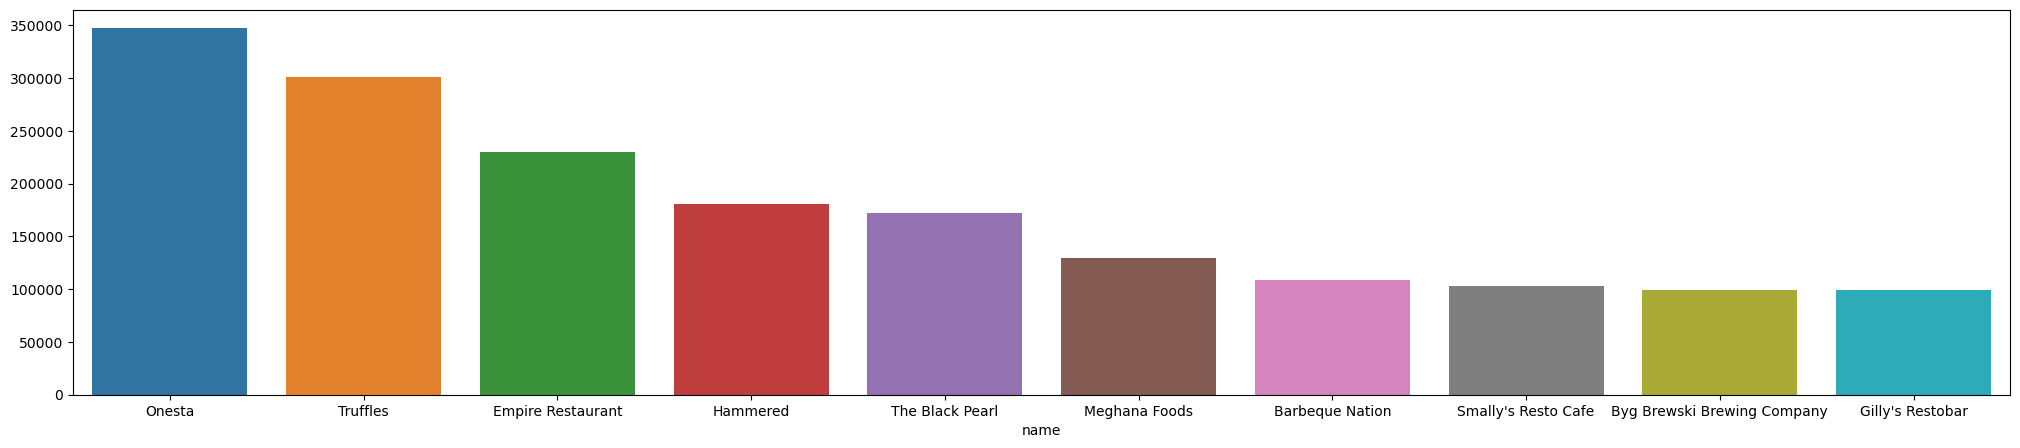

In [217]:
plt.figure(figsize=(25,5))
sns.barplot(x=df.groupby("name").sum()["votes"].sort_values(ascending = False).head(10).index,y=df.groupby("name").sum()["votes"].sort_values(ascending = False).head(10).values)

#### What are the top 10  popular cuisines offered by Bangalore restaurants?

In [209]:
df_cuisines_encoded.sum().sort_values(ascending=False).head(10)

North Indian    17180
Chinese         12834
South Indian     6351
Fast Food        6310
Continental      5180
Biryani          5008
Cafe             4781
Desserts         4501
Beverages        3828
Italian          3167
dtype: int64

<AxesSubplot:>

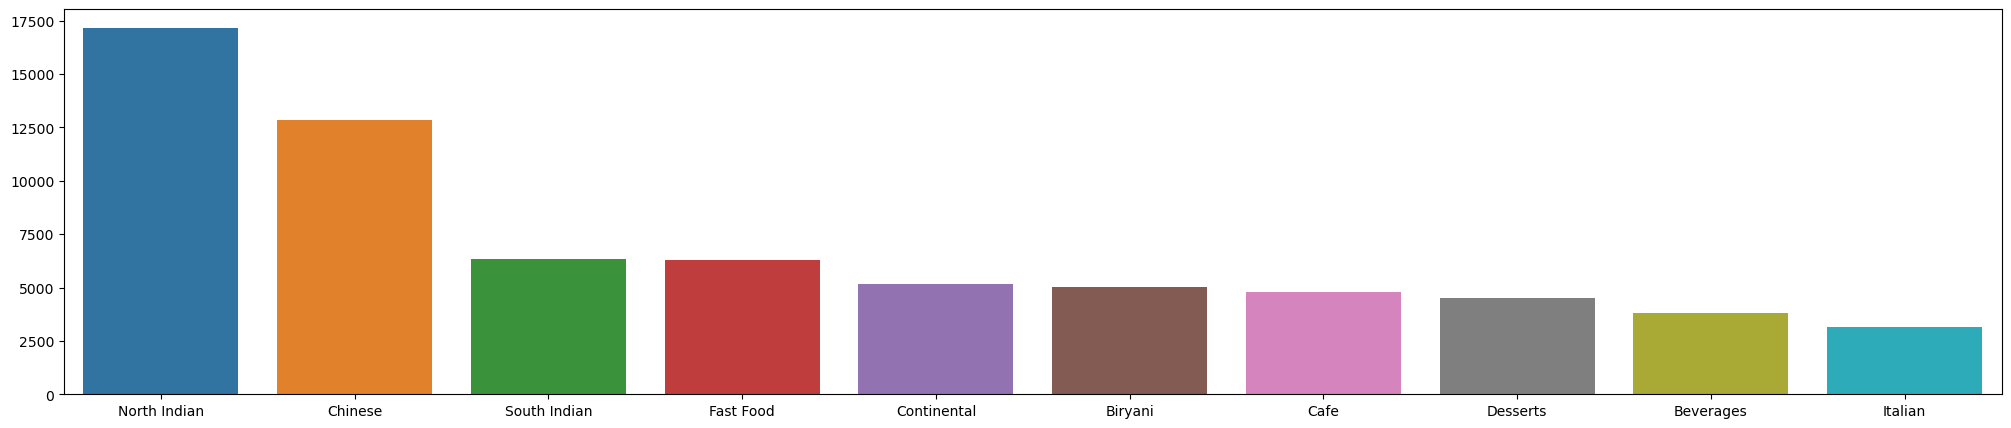

In [219]:
plt.figure(figsize=(25,5))
sns.barplot(x=df_cuisines_encoded.sum().sort_values(ascending=False).head(10).index,y=df_cuisines_encoded.sum().sort_values(ascending=False).head(10).values)

#### what are the top 10 expensive rest_types in average?

In [304]:
df.groupby("rest_type")["approx_cost(for two people)"].mean().sort_values(ascending = False).head(10).

rest_type
Fine Dining, Bar             3015.384615
Fine Dining, Microbrewery    3000.000000
Fine Dining, Lounge          3000.000000
Fine Dining                  2722.807018
Bar, Lounge                  2450.000000
Club, Casual Dining          2400.000000
Club                         2150.000000
Lounge, Bar                  2027.777778
Lounge, Microbrewery         2000.000000
Bar, Quick Bites             2000.000000
Name: approx_cost(for two people), dtype: float64

#### Which locations in Bangalore have the highest concentration of restaurants and draw the top 10?


In [383]:
Top_10_Locations = df["location"].value_counts().head(10).reset_index()
Top_10_Locations

index  location
0                    BTM      3873
1  Koramangala 5th Block      2295
2                    HSR      1992
3            Indiranagar      1795
4               JP Nagar      1710
5              Jayanagar      1634
6             Whitefield      1568
7           Marathahalli      1407
8      Bannerghatta Road      1224
9  Koramangala 7th Block      1053

<AxesSubplot:xlabel='index', ylabel='location'>

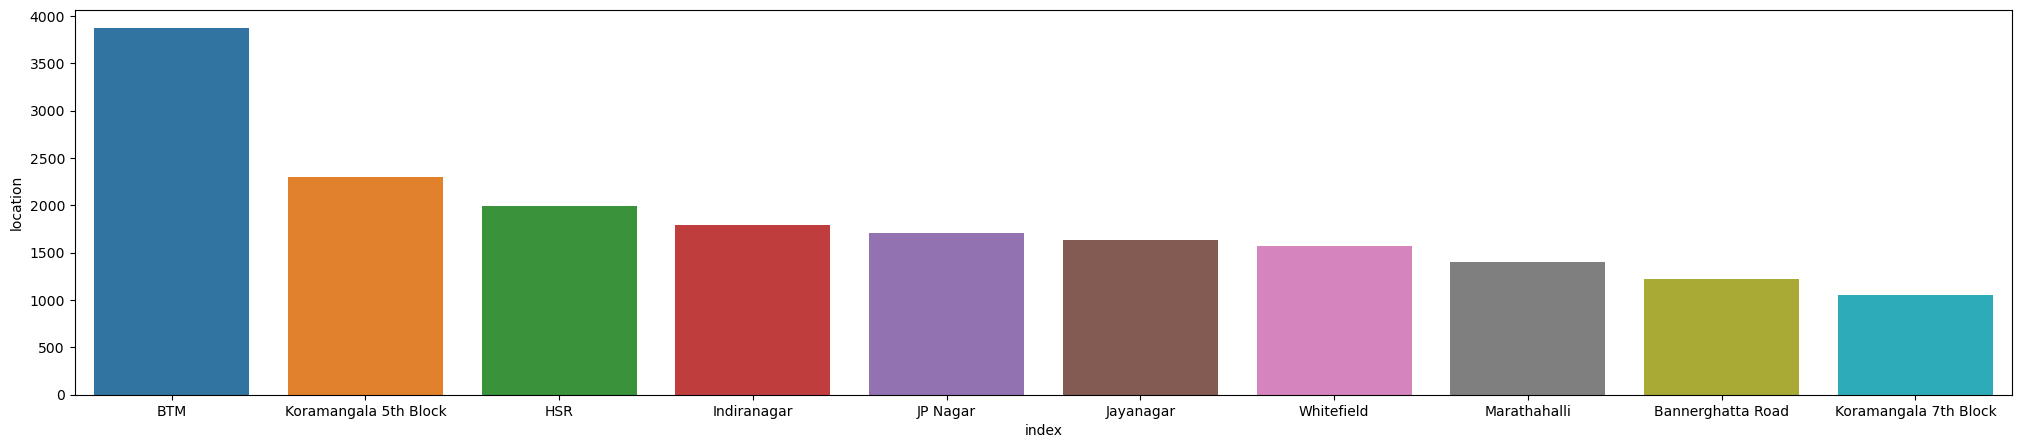

In [312]:
plt.figure(figsize=(25,5))
sns.barplot(data=Top_10_Locations,x='index',y='location')

In [308]:
# plotly Chart
px.histogram(data_frame=Top_10_Locations , x ="index" , y ="location")

#### What is the distribution of restaurant ratings in Bangalore?


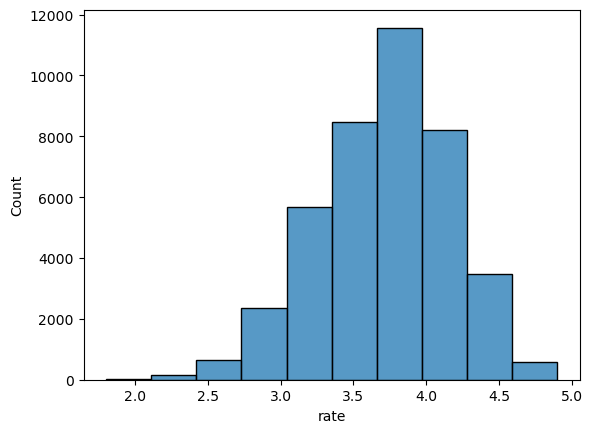

In [316]:
sns.histplot(data=df,x='rate',bins=10)
plt.show()

In [313]:
# plotly chart
px.histogram(data_frame=df , x ="rate")

#### Are there any correlations between the number of votes a restaurant receives and its rating?

In [317]:
df[["rate" , "votes"]].corr()

rate     votes
rate   1.000000  0.434746
votes  0.434746  1.000000

In [ ]:
# don't have strong corrolations 
# when votes increase the rate increase but is more simple 

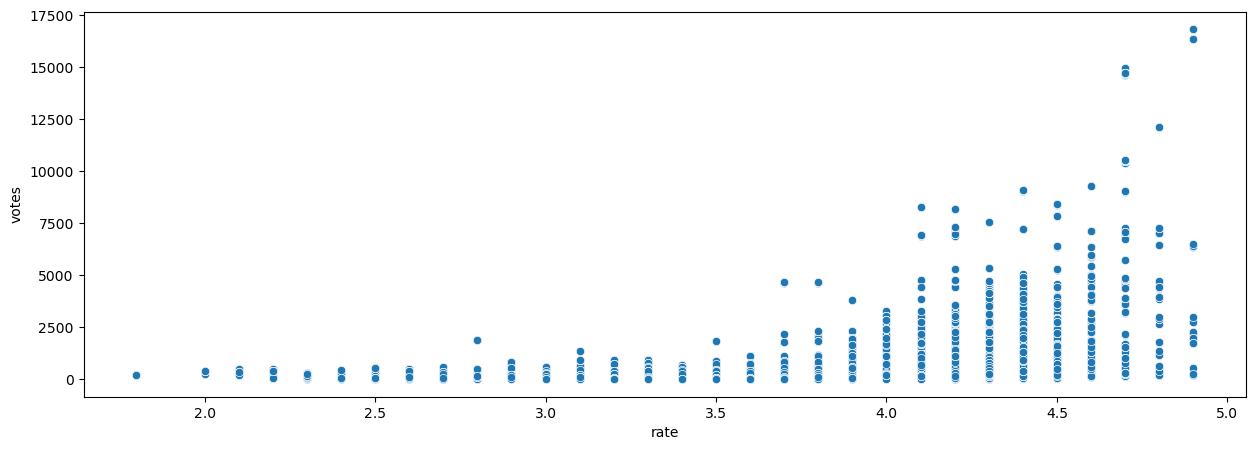

In [323]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='rate',y='votes')
plt.show()

In [318]:
# plotly chart
px.scatter(data_frame=df , x = "rate" , y ="votes")

#### What are the top 10 rated restaurants ?


In [384]:
df.name.loc[36488] = 'Sante Spa Cuisine' # rename the restauratn 

C:\Users\alaa_\AppData\Local\Temp\ipykernel_15320\867316033.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [385]:
top=df.groupby("name")["rate"].mean().sort_values(ascending = False).head(10).reset_index()
top

name      rate
0               Sante Spa Cuisine  4.900000
1     Byg Brewski Brewing Company  4.900000
2  Asia Kitchen By Mainland China  4.900000
3                    Punjab Grill  4.871429
4          Belgian Waffle Factory  4.844828
5                        Flechazo  4.800000
6                The Pizza Bakery  4.800000
7              O.G. Variar & Sons  4.800000
8       AB's - Absolute Barbecues  4.789474
9                      Biergarten  4.766667

#### How many restaurants offer online ordering and table booking services?


In [386]:
df[(df["online_order"] == "Yes" ) & (df["book_table"] == "Yes")].shape[0]

3734

In [389]:
df_copy=df.copy()

#### Which restaurant types are most likely to offer online ordering and table booking?


In [393]:
df_rest_types = pd.DataFrame(df["rest_type"].apply(lambda r : r.replace(", " , ",").split(",")))
df_rest_encoded = pd.DataFrame(mlb.fit_transform(df_rest_types["rest_type"]) , columns=mlb.classes_)
df_rest_encoded = pd.concat([df[["online_order" , "book_table"]]  ,df_rest_encoded ] , axis = 1 )
df_rest_encoded

online_order book_table  Bakery  Bar  Beverage Shop  Bhojanalya  Cafe  \
0              Yes        Yes       0    0              0           0     0   
1              Yes         No       0    0              0           0     0   
2              Yes         No       0    0              0           0     1   
3               No         No       0    0              0           0     0   
4               No         No       0    0              0           0     0   
...            ...        ...     ...  ...            ...         ...   ...   
41185           No         No       0    1              0           0     0   
41186           No         No       0    1              0           0     0   
41187           No         No       0    1              0           0     0   
41188           No        Yes       0    1              0           0     0   
41189           No         No       0    1              0           0     0   

       Casual Dining  Club  Confectionery  Delivery  Dessert Parlor  Dhaba  \
0                  1     0              0         0               0      0   
1                  1     0              0         0               0      0   
2                  1     0              0         0               0      0   
3                  0     0              0         0               0      0   
4                  1     0              0         0               0      0   
...              ...   ...            ...       ...             ...    ...   
41185              1     0              0         0               0      0   
41186              1     0              0         0               0      0   
41187              0     0              0         0               0      0   
41188              0     0              0         0               0      0   
41189              1     0              0         0               0      0   

       Fine Dining  Food Court  Food Truck  Irani Cafee  Kiosk  Lounge  \
0                0           0           0            0      0       0   
1                0           0           0            0      0       0   
2                0           0           0            0      0       0   
3                0           0           0            0      0       0   
4                0           0           0            0      0       0   
...            ...         ...         ...          ...    ...     ...   
41185            0           0           0            0      0       0   
41186            0           0           0            0      0       0   
41187            0           0           0            0      0       0   
41188            0           0           0            0      0       0   
41189            0           0           0            0      0       0   

       Meat Shop  Mess  Microbrewery  Pub  Quick Bites  Sweet Shop  Takeaway  
0              0     0             0    0            0           0         0  
1              0     0             0    0            0           0         0  
2              0     0             0    0            0           0         0  
3              0     0             0    0            1           0         0  
4              0     0             0    0            0           0         0  
...          ...   ...           ...  ...          ...         ...       ...  
41185          0     0             0    0            0           0         0  
41186          0     0             0    0            0           0         0  
41187          0     0             0    0            0           0         0  
41188          0     0             0    0            0           0         0  
41189          0     0             0    0            0           0         0  

[41190 rows x 26 columns]

In [397]:
df_rest_encoded[(df_rest_encoded["online_order"] == "Yes") & (df_rest_encoded["book_table"] == "Yes")].sum(numeric_only=True).sort_values(ascending = False)

Casual Dining     2837
Cafe               744
Bar                704
Pub                273
Microbrewery       115
Quick Bites         95
Lounge              42
Fine Dining         29
Club                16
Irani Cafee         15
Dessert Parlor      14
Bakery              12
Takeaway             4
Delivery             4
Food Truck           0
Dhaba                0
Kiosk                0
Meat Shop            0
Mess                 0
Confectionery        0
Bhojanalya           0
Beverage Shop        0
Sweet Shop           0
Food Court           0
dtype: int64

#### How do the average ratings differ for restaurants with and without online ordering?


In [398]:
df.groupby("online_order")["rate"].mean()

online_order
No     3.659538
Yes    3.723796
Name: rate, dtype: float64

#### Are there any specific areas in Bangalore known for particular cuisines?


In [399]:
df_cuisines_encoded = pd.concat([df_cuisines_encoded , df["location"]],  axis=1 )
df_cuisines_encoded

Afghan  Afghani  African  American  Andhra  Arabian  Asian  Assamese  \
0           0        0        0         0       0        0      0         0   
1           0        0        0         0       0        0      0         0   
2           0        0        0         0       0        0      0         0   
3           0        0        0         0       0        0      0         0   
4           0        0        0         0       0        0      0         0   
...       ...      ...      ...       ...     ...      ...    ...       ...   
41185       0        0        0         0       0        0      0         0   
41186       0        0        0         0       1        0      0         0   
41187       0        0        0         0       0        0      0         0   
41188       0        0        0         0       0        0      0         0   
41189       0        0        0         0       0        0      0         0   

       Australian  Awadhi  BBQ  Bakery  Bar Food  Belgian  Bengali  Beverages  \
0               0       0    0       0         0        0        0          0   
1               0       0    0       0         0        0        0          0   
2               0       0    0       0         0        0        0          0   
3               0       0    0       0         0        0        0          0   
4               0       0    0       0         0        0        0          0   
...           ...     ...  ...     ...       ...      ...      ...        ...   
41185           0       0    0       0         0        0        0          0   
41186           0       0    0       0         0        0        0          0   
41187           0       0    0       0         0        0        0          0   
41188           0       0    0       0         0        0        0          0   
41189           0       0    0       0         0        0        0          0   

       Bihari  ...  South American  South Indian  Spanish  Sri Lankan  Steak  \
0           0  ...               0             0        0           0      0   
1           0  ...               0             0        0           0      0   
2           0  ...               0             0        0           0      0   
3           0  ...               0             1        0           0      0   
4           0  ...               0             0        0           0      0   
...       ...  ...             ...           ...      ...         ...    ...   
41185       0  ...               0             0        0           0      0   
41186       0  ...               0             1        0           0      0   
41187       0  ...               0             0        0           0      0   
41188       0  ...               0             0        0           0      0   
41189       0  ...               0             0        0           0      0   

       Street Food  Sushi  Tamil  Tea  Tex-Mex  Thai  Tibetan  Turkish  Vegan  \
0                0      0      0    0        0     0        0        0      0   
1                0      0      0    0        0     1        0        0      0   
2                0      0      0    0        0     0        0        0      0   
3                0      0      0    0        0     0        0        0      0   
4                0      0      0    0        0     0        0        0      0   
...            ...    ...    ...  ...      ...   ...      ...      ...    ...   
41185            0      0      0    0        0     0        0        0      0   
41186            0      0      0    0        0     0        0        0      0   
41187            0      0      0    0        0     0        0        0      0   
41188            0      0      0    0        0     0        0        0      0   
41189            0      0      0    0        0     0        0        0      0   

       Vietnamese  Wraps                    location  
0               0      0                Banashankari  
1               0      0                B

In [400]:
# plotly heatmap
fig = px.imshow(df_cuisines_encoded.groupby("location").sum(numeric_only=True))
fig.update_layout(
    height=700,  # Set the desired height
    width=1200,   # Set the desired width
)

fig.show()

<AxesSubplot:ylabel='location'>

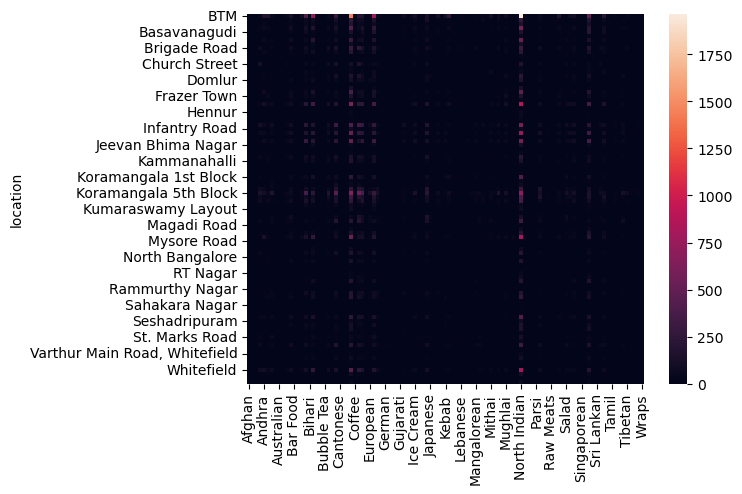

In [401]:
sns.heatmap(df_cuisines_encoded.groupby("location").sum(numeric_only=True),)

#### Are there any differences in restaurant ratings based on the type of listing (e.g., buffet, delivery, dine-out)?


In [437]:
df.groupby("listed_in(type)")["rate"].mean().reset_index()

listed_in(type)      rate
0              Buffet  3.980969
1               Cafes  3.872138
2            Delivery  3.654881
3            Desserts  3.779070
4            Dine-out  3.682342
5  Drinks & nightlife  4.013776
6       Pubs and bars  4.021270

<AxesSubplot:xlabel='listed_in(type)', ylabel='rate'>

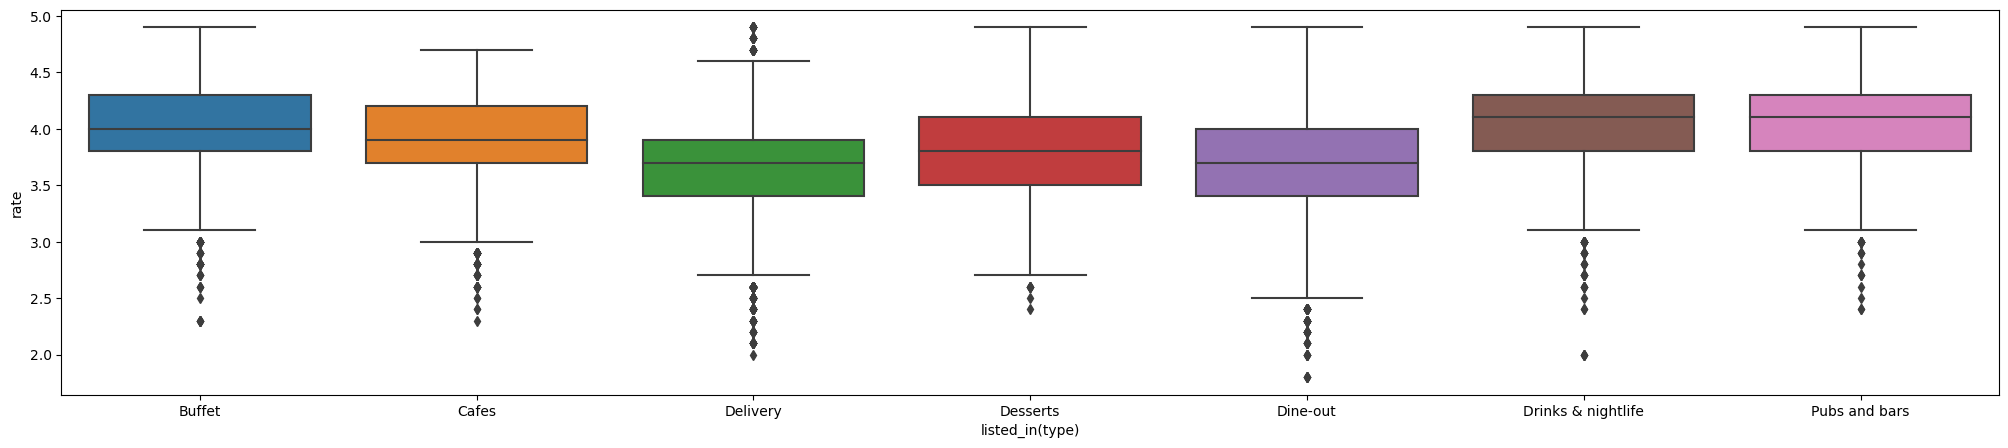

In [438]:
plt.figure(figsize=(25,5))
sns.boxplot(data=df,x='listed_in(type)',y='rate')

#### Data Preparation for Machine Learning

In [440]:
def Create_Target(r):
    if r >= 3.75 :
        return 1
    else:
        return 0

In [441]:
df["Target"] = df["rate"].apply(Create_Target)

#### Remove the unnecessary Columns

In [442]:
df.drop(["name" , "cuisines" ,"rest_type" ,"rate" ] , axis = 1 , inplace = True)

#### Decide the appropiate Type for Encoding

In [443]:
Cat_feat = df.select_dtypes(include="object_")

In [444]:
for feature in Cat_feat:
    print(f"Feature {feature} has {Cat_feat[feature].nunique()} unique values ")

Feature online_order has 2 unique values 
Feature book_table has 2 unique values 
Feature location has 92 unique values 
Feature listed_in(type) has 7 unique values 
Feature listed_in(city) has 30 unique values 


##### Let's Investigate Location feature

In [445]:
df_location_counts = df["location"].value_counts(normalize=True) * 100

In [447]:
df_location_counts

BTM                      9.402768
Koramangala 5th Block    5.571741
HSR                      4.836125
Indiranagar              4.357854
JP Nagar                 4.151493
                           ...   
Yelahanka                0.009711
West Bangalore           0.007283
Rajarajeshwari Nagar     0.004856
Nagarbhavi               0.002428
Peenya                   0.002428
Name: location, Length: 92, dtype: float64

In [448]:
Desired_Index = df_location_counts[df_location_counts.values > 0.5].index

In [449]:
def Reduce_Location(r):
    if r in Desired_Index:
        return r
    else:
        return "other"

In [450]:
df["location"] = df["location"].apply(Reduce_Location)

#### Let's Investigate listed_in(city)

In [451]:
df["listed_in(city)"].value_counts(normalize= True) * 100

BTM                      6.258801
Koramangala 7th Block    5.729546
Koramangala 4th Block    5.469774
Koramangala 5th Block    5.455208
Koramangala 6th Block    5.146880
Jayanagar                4.646759
JP Nagar                 3.962127
Indiranagar              3.729060
MG Road                  3.663511
Church Street            3.629522
Brigade Road             3.597961
Lavelle Road             3.517844
Residency Road           3.262928
HSR                      3.226511
Marathahalli             3.136684
Bannerghatta Road        2.930323
Whitefield               2.915756
Old Airport Road         2.842923
Brookefield              2.765234
Basavanagudi             2.602573
Sarjapur Road            2.469046
Kammanahalli             2.469046
Kalyan Nagar             2.401068
Frazer Town              2.313668
Bellandur                2.311241
Malleshwaram             2.296674
Rajajinagar              2.117019
Electronic City          1.985919
Banashankari             1.764992
New BEL Road  

#### We can't remove categories here as they have the same number of distributions

### we will do one hot encoding for :
    - online_order
    - book_table
    - listed_in(type)
### we also do binary encoder for:
    - location
    - listed_in(city)

#### Let's Decide Scaling Techniques

In [72]:
df.columns

Index(['online_order', 'book_table', 'votes', 'location',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)',
       'cuisines_counts', 'rest_type_counts', 'Target'],
      dtype='object')

In [439]:
px.box(data_frame=df , x = "approx_cost(for two people)")

#### There are many outliers , so we will use Robust Scaler for scaling data

In [453]:
df.duplicated().sum()

275

In [452]:
df.to_csv(r"E:\CV files\zomato\Zomato_EDA.csv" , index=False)